In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
warnings.filterwarnings('ignore')

import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
C:\Users\Trader\AppData\Local\Temp\ipykernel_4280\2963385244.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
!pip install yahoofinancials

In [3]:
import yfinance as yf
from yahoofinancials import YahooFinancials

In [4]:
tesla = yf.download('TSLA', 
                      start='2020-01-01', 
                      end='2022-03-30', 
                      progress=False,
)
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,81.000000,84.258003,80.416000,83.666000,83.666000,51428500
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500


In [5]:
tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22973600
2022-03-25,1008.000000,1021.799988,997.320007,1010.640015,1010.640015,20677200
2022-03-28,1065.099976,1097.880005,1053.599976,1091.839966,1091.839966,34168700
2022-03-29,1107.989990,1114.770020,1073.109985,1099.569946,1099.569946,24538300


In [6]:
type(tesla)

pandas.core.frame.DataFrame

In [7]:
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 566 entries, 2019-12-31 to 2022-03-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       566 non-null    float64
 1   High       566 non-null    float64
 2   Low        566 non-null    float64
 3   Close      566 non-null    float64
 4   Adj Close  566 non-null    float64
 5   Volume     566 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 31.0 KB
None


In [8]:
tesla.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
tesla_close = tesla['Close']

In [10]:
tesla_close.head()

Date
2019-12-31    83.666000
2020-01-02    86.052002
2020-01-03    88.601997
2020-01-06    90.307999
2020-01-07    93.811996
Name: Close, dtype: float64

In [11]:
tesla_close.index

DatetimeIndex(['2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-21',
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-28', '2022-03-29'],
              dtype='datetime64[ns]', name='Date', length=566, freq=None)

In [12]:
tesla_close.describe().T

count     566.000000
mean      575.570412
std       306.981838
min        72.244003
25%       297.602486
50%       642.570007
75%       794.914978
max      1229.910034
Name: Close, dtype: float64

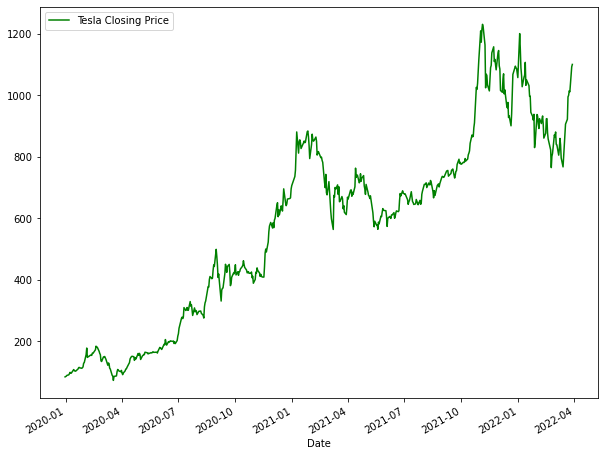

In [13]:
tesla_close.plot(figsize=(10,8),color='green',label='Tesla Closing Price')
plt.legend(loc='upper left');

In [14]:
type(tesla_close)

pandas.core.series.Series

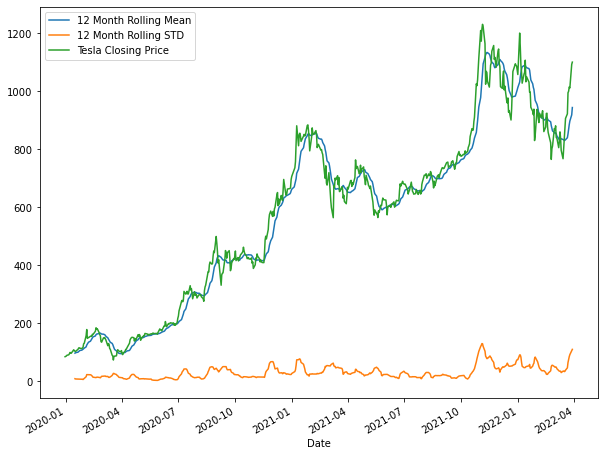

In [15]:
tesla_close.rolling(12).mean().plot(label='12 Month Rolling Mean',figsize=(10,8))
tesla_close.rolling(12).std().plot(label='12 Month Rolling STD')
tesla_close.plot(label='Tesla Closing Price')
plt.legend();

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

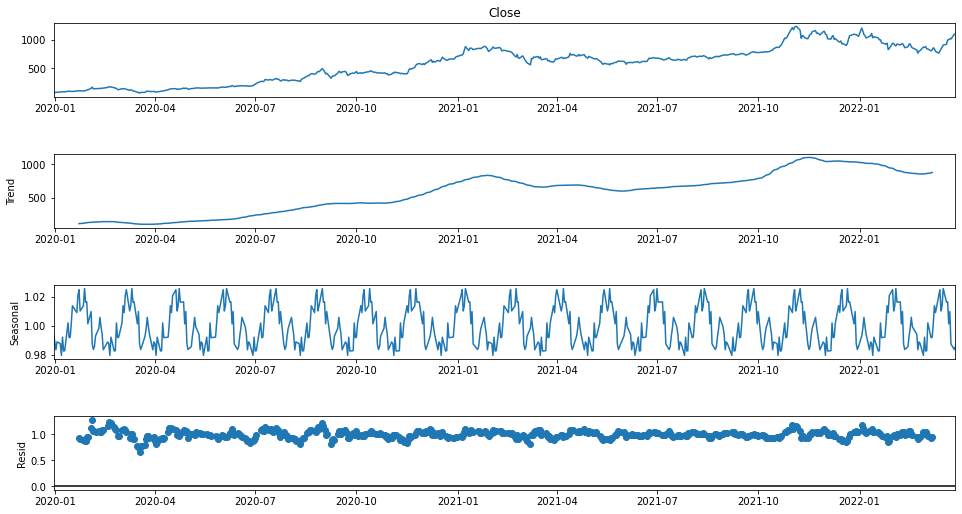

In [40]:
decomp = seasonal_decompose(tesla_close,model = 'multiplicative', period=30)  
fig = plt.figure()  
fig = decomp.plot()  
fig.set_size_inches(15, 8)

### Dicky Fuller Test

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
result = adfuller(tesla_close)

In [43]:
result

(-0.9061971860477342,
 0.7859247450518259,
 0,
 565,
 {'1%': -3.4419770063102213,
  '5%': -2.866669060591297,
  '10%': -2.5695016312945413},
 5113.03280397118)

In [44]:
def adf_check(tesla_close):
    
    result=adfuller(tesla_close)
    print(" Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic','p-value','# of lags','Num of Obseravtions used']
    
    for value,label in zip(result,labels):
        print(label+" : "+str(value))
        
    if result[1]<=0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root, it is non-stationary")

In [45]:
adf_check(tesla_close)

 Augmented Dicky-Fuller Test
ADF Test Statistic : -0.9061971860477342
p-value : 0.7859247450518259
# of lags : 0
Num of Obseravtions used : 565
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [46]:
tesla['First Difference'] = tesla_close - tesla_close.shift(1)

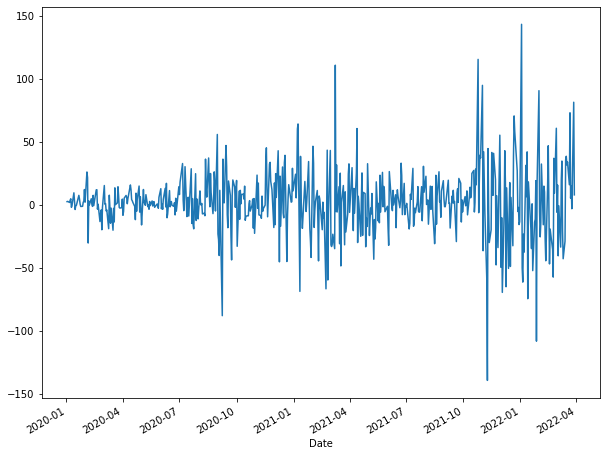

In [47]:
tesla['First Difference'].plot(figsize=(10,8));

In [48]:
adf_check(tesla['First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -24.02434025323525
p-value : 0.0
# of lags : 0
Num of Obseravtions used : 564
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


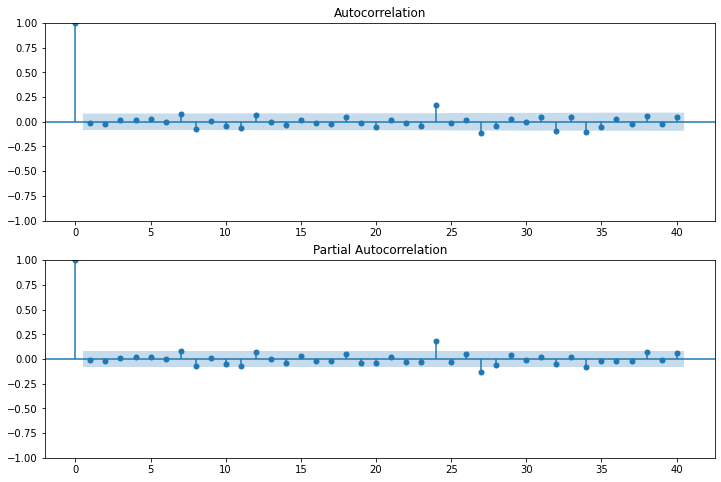

In [49]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tesla['First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tesla['First Difference'].iloc[13:], lags=40, ax=ax2)

In [50]:
from statsmodels.tsa.arima.model import ARIMA

In [51]:
from pmdarima.arima import auto_arima

In [52]:
#Modeling
# Build Model
model = ARIMA(tesla_close, order=(1, 0, 1))  
results = model.fit()  
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  566
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2643.026
Date:                Fri, 08 Apr 2022   AIC                           5294.051
Time:                        10:37:02   BIC                           5311.405
Sample:                             0   HQIC                          5300.824
                                - 566                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        575.5762    301.828      1.907      0.057     -15.996    1167.149
ar.L1          0.9981      0.003    346.587      0.000       0.992       1.004
ma.L1         -0.0073      0.032     -0.226      0.8

In [53]:
results.resid

Date
2019-12-31   -491.910173
2020-01-02      1.449645
2020-01-03      1.642260
2020-01-06      0.804451
2020-01-07      2.599555
                 ...    
2022-03-23      6.450014
2022-03-24     15.651390
2022-03-25     -2.343881
2022-03-28     81.999023
2022-03-29      9.294717
Length: 566, dtype: float64

<AxesSubplot:xlabel='Date'>

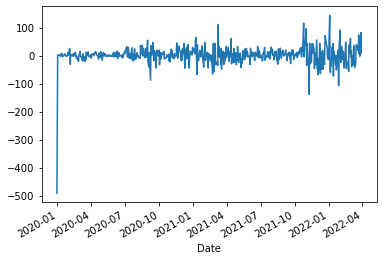

In [54]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

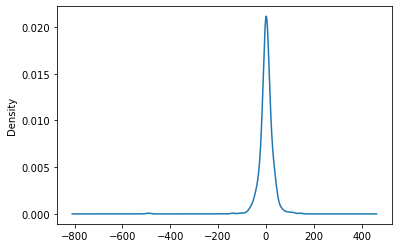

In [55]:
results.resid.plot(kind='kde')

In [56]:
results

<AxesSubplot:xlabel='Date'>

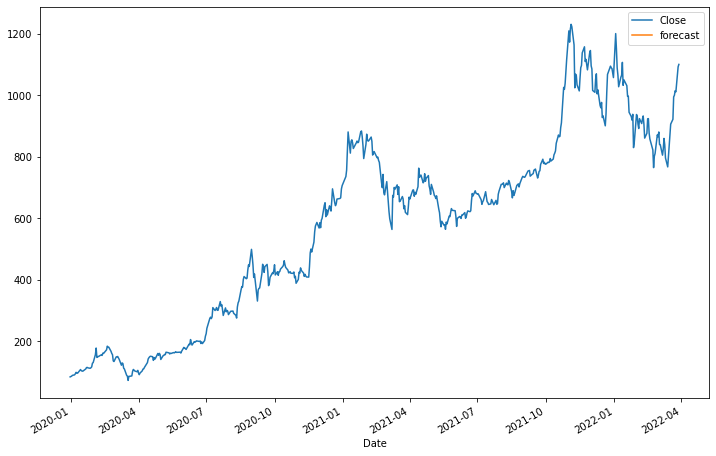

In [57]:
tesla['forecast'] = results.predict(start = 550, end= 566, dynamic= True)  
tesla[['Close','forecast']].plot(figsize=(12,8))

In [58]:
tesla.tail()

,Open,High,Low,Close,Adj Close,Volume,First Difference,forecast
Date,,,,,,,,
2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,5.130005,NaN
2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22973600,14.809998,NaN
2022-03-25,1008.000000,1021.799988,997.320007,1010.640015,1010.640015,20677200,-3.279968,NaN
2022-03-28,1065.099976,1097.880005,1053.599976,1091.839966,1091.839966,34168700,81.199951,NaN
2022-03-29,1107.989990,1114.770020,1073.109985,1099.569946,1099.569946,24538300,7.729980,NaN


In [59]:
tesla['forecast'].max()

nan